In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lasio
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb

In [2]:
def log_plot(logs):
    logs = logs.sort_values(by='DEPTH')
    top = logs.DEPTH.min()
    bot = logs.DEPTH.max()
    
    f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,8))
    ax[0].plot(logs.DT, logs.DEPTH, color='red')
    ax[1].plot(logs.GR, logs.DEPTH, color='black')
    ax[2].plot(logs.NPHI, logs.DEPTH, color='blue')
    ax[3].plot(logs.RHOB, logs.DEPTH, color='c')
    ax[4].plot(logs.RT, logs.DEPTH, color='m')
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("DT (us/ft)")
    ax[0].set_xlim(30, 150)
    ax[0].set_ylabel("Depth(ft)")
    ax[1].set_xlabel("GR (API)")
    ax[1].set_xlim(logs.GR.min(), 200)
    ax[2].set_xlabel("NPHI (v/v)")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel("RHOB (g/cm3)")
    ax[3].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[4].set_xlabel("RT (ohm.m)")
    ax[4].set_xlim(-2,logs.RT.max())
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]);
    ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[4].set_yticklabels([]) 
    
    f.suptitle('Well: 15-9-F-11', fontsize=14,y=0.94)

In [4]:
def log_plot1(logs):
    logs = logs.sort_values(by='DEPTH')
    top = logs.DEPTH.min()
    bot = logs.DEPTH.max()
    
    f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,8))
    ax[0].plot(logs.DT, logs.DEPTH, color='red')
    ax[1].plot(logs.GR, logs.DEPTH, color='black')
    ax[2].plot(logs.NPHI, logs.DEPTH, color='blue')
    ax[3].plot(logs.RHOB, logs.DEPTH, color='c')
    ax[4].plot(logs.RT, logs.DEPTH, color='m')
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("DT (us/ft)")
    ax[0].set_xlim(logs.DT.min(), logs.DT.max())
    ax[0].set_ylabel("Depth(ft)")
    ax[1].set_xlabel("GR (API)")
    ax[1].set_xlim(logs.GR.min(), 200)
    ax[2].set_xlabel("NPHI (v/v)")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel("RHOB (g/cm3)")
    ax[3].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[4].set_xlabel("RT (ohm.m)")
    ax[4].set_xlim(-2,logs.RT.max())
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]);
    ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[4].set_yticklabels([]) 
    
    f.suptitle('Well: 15-9-F-11', fontsize=14,y=0.94)

In [14]:
df = pd.read_csv('11A.csv')
df1 = df.dropna()
test = pd.read_csv('edited.csv')
test = test.dropna()

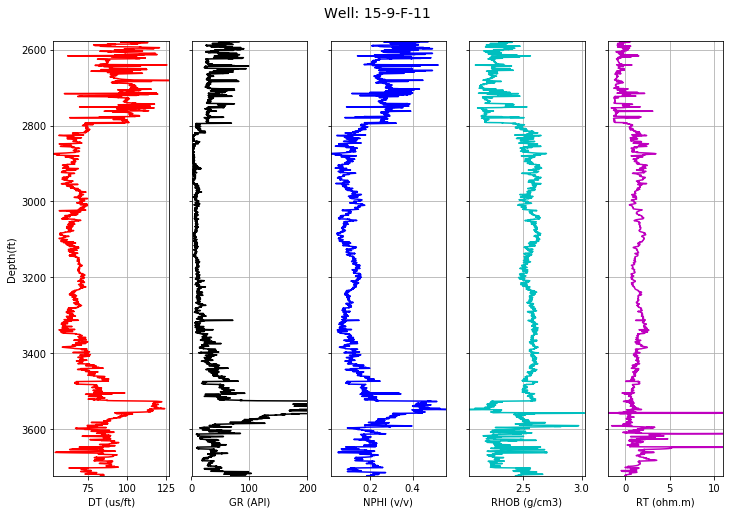

In [6]:
log_plot1(test)

In [15]:
labels = np.array(df1['DT'])
df1 = df1.drop(['DEPTH', 'DT'], axis=1)
features = np.array(df1)

## Randomly sample cases to create independent training and test data
np.random.seed(9988)
indx = range(features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.3)
x_train = features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

## Randomly sample cases to create independent training and test data
np.random.seed(9988)
indx1 = range(x_test.shape[0])
indx1 = ms.train_test_split(indx1, test_size = 0.5)
x_test1 = x_test[indx1[0],:]
y_test1 = np.ravel(y_test[indx1[0]])
x_test2 = x_test[indx1[1],:]
y_test2 = np.ravel(y_test[indx1[1]])

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(29480, 4)
(29480,)
(12635, 4)
(12635,)


In [17]:
print(x_test1.shape)
print(y_test1.shape)
print(x_test2.shape)
print(y_test2.shape)

(6317, 4)
(6317,)
(6318, 4)
(6318,)


In [10]:
df1.shape

(42115, 4)

In [12]:
params = {'n_estimators': [300, 400, 600, 800, 1000],
         
         'max_depth': [10, 12, 14, 16, 18]}

ext = ExtraTreesRegressor()

grid_ext = GridSearchCV(estimator=ext, param_grid=params, scoring='r2', cv=5,
                      verbose=3, n_jobs=-1)

grid_ext.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 33.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [300, 400, 600, 800, 1000], 'max_depth': [10, 12, 14, 16, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=3)

In [13]:
print(grid_ext.best_estimator_)
print(grid_ext.score(x_test, y_test))

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=18,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)
0.9625442867691237


In [18]:
ext = ExtraTreesRegressor(n_estimators=600, max_depth=18, min_samples_split=2, min_samples_leaf=1,
                         max_features='auto')
ext.fit(x_train, y_train)

In [19]:
pred_ext = ext.predict(x_test)

print(f'The R2_score of DT values predicted on the validation data is {r2_score(pred_ext, y_test) * 100}')

The R2_score of DT values predicted on the validation data is 96.17305539562686


In [22]:
test = pd.read_csv('edited.csv')
test = test.dropna()

dt = np.array(test['DT'])
test_enc = test.drop(['DT', 'DEPTH'], axis=1)
test_enc = np.array(test_enc)
predictions_ext = ext.predict(test_enc)

In [23]:
print(f'The RMSE of DT values predicted on the validation data is {mean_squared_error(predictions_ext, dt) ** 0.5}')
print(f'The R2_Score of DT values predicted on the validation data is {r2_score(predictions_ext, dt) * 100}')

The RMSE of DT values predicted on the validation data is 4.599004652137041
The R2_Score of DT values predicted on the validation data is 89.72613829398037


In [25]:
dtr = DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=1, min_impurity_split=2)
dtr.fit(x_train, y_train)
predictions_dtr = dtr.predict(test_enc)

print(f'The RMSE of DT values predicted on the validation data is {mean_squared_error(predictions_dtr, dt) ** 0.5}')
print(f'The R2_score of DT values predicted on the validation data is {r2_score(predictions_dtr, dt) * 100}')

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


The RMSE of DT values predicted on the validation data is 4.949100275140616
The R2_score of DT values predicted on the validation data is 88.1912326634299


In [29]:
print(dt[0:20])
print('')
print(predictions_dtr[0:20])
print('')
print(predictions_ext[0:20])
print('')
print(avg[0:20])

[109.385 110.132 110.843 111.01  110.797 110.053 108.81  107.26  106.38
 105.081 103.452 103.758 103.968 104.077 105.942 107.291 107.911 108.167
 108.126 107.677]

[103.54542923 103.54542923 103.54542923 103.54542923 103.54542923
 103.54542923 103.54542923 103.54542923  98.02876639  98.02876639
  98.02876639  98.02876639  98.02876639  98.02876639 103.54542923
 103.54542923 103.54542923 103.54542923 111.43316189 111.43316189]

[106.45380787 107.43782591 107.93467078 107.73589319 107.28296748
 107.66806038 105.59641818 103.86035794 100.65866107 100.53537847
  99.82832051  90.71861895  92.81114597  94.25272272 101.59678966
 106.70732874 105.88782227 107.16305409 108.27069794 109.00146364]

[104.99961855 105.49162757 105.74005    105.64066121 105.41419835
 105.60674481 104.5709237  103.70289358  99.34371373  99.28207243
  98.92854345  94.37369267  95.41995618  96.14074455 102.57110944
 105.12637898 104.71662575 105.35424166 109.85192991 110.21731276]


In [30]:
print(f'The RMSE of DT values predicted on the validation data is {mean_squared_error(avg, dt) ** 0.5}')
print(f'The R2_score of DT values predicted on the validation data is {r2_score(avg, dt) * 100}')

The RMSE of DT values predicted on the validation data is 4.600279795617988
The R2_score of DT values predicted on the validation data is 89.67607070966785


In [28]:
avg = (predictions_dtr + predictions_ext)/2

In [31]:
ext1 = ExtraTreesRegressor(n_estimators=600, max_depth=18, min_samples_split=2, min_samples_leaf=1,
                         max_features='auto')
ext1.fit(features, labels)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=18,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
ext1 = ExtraTreesRegressor(n_estimators=600, max_depth=18, min_samples_split=2, min_samples_leaf=1,
                         max_features='auto')
ext1.fit(features, labels)
pred_ext1 = ext1.predict(test_enc)

print(f'The RMSE of DT values predicted on the validation data is {mean_squared_error(pred_ext1, dt) ** 0.5}')
print(f'The R2_score of DT values predicted on the validation data is {r2_score(pred_ext1, dt) * 100}')

The RMSE of DT values predicted on the validation data is 4.566053583740003
The R2_score of DT values predicted on the validation data is 89.84066743075905


In [34]:
rf1 = RandomForestRegressor(n_estimators=600, max_depth=18, min_samples_split=2, min_samples_leaf=1,
                         max_features='auto')
rf1.fit(features, labels)
pred_rf1 = rf1.predict(test_enc)

print(f'The RMSE of DT values predicted on the validation data is {mean_squared_error(pred_rf1, dt) ** 0.5}')
print(f'The R2_score of DT values predicted on the validation data is {r2_score(pred_rf1, dt) * 100}')

The RMSE of DT values predicted on the validation data is 4.740282705229195
The R2_score of DT values predicted on the validation data is 89.13991903498344


In [35]:
dtr1 = DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=1, min_impurity_split=2)
dtr1.fit(features, labels)
pred_dtr1 = dtr1.predict(test_enc)

print(f'The RMSE of DT values predicted on the validation data is {mean_squared_error(pred_dtr1, dt) ** 0.5}')
print(f'The R2_score of DT values predicted on the validation data is {r2_score(pred_dtr1, dt) * 100}')

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


The RMSE of DT values predicted on the validation data is 4.780883736651548
The R2_score of DT values predicted on the validation data is 88.76987551571595


In [37]:
avg1 = (pred_rf1 + pred_ext1)/2

In [38]:
print(f'The RMSE of DT values predicted on the validation data is {mean_squared_error(avg1, dt) ** 0.5}')
print(f'The R2_score of DT values predicted on the validation data is {r2_score(avg1, dt) * 100}')

The RMSE of DT values predicted on the validation data is 4.61712376021411
The R2_score of DT values predicted on the validation data is 89.63751249205481


In [40]:
results = pd.DataFrame()

results['RFR'] = pred_rf1
results['EXT'] = pred_ext1
results['DTR'] = pred_dtr1
results['AVG'] = avg1

results.head()

,RFR,EXT,DTR,AVG
0,105.891481,106.165033,108.386597,106.028257
1,107.971090,107.300506,108.386597,107.635798
2,107.383804,107.325252,108.386597,107.354528
3,107.827323,107.169415,101.987901,107.498369
4,107.961429,106.851406,101.987901,107.406418


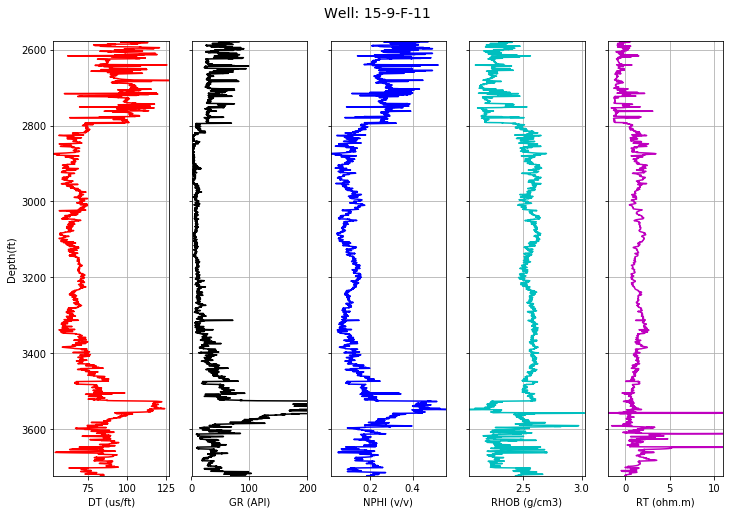

In [41]:
#df = pd.read_csv('f1.csv')
df1 = df.dropna()
test = pd.read_csv('edited.csv')
test = test.dropna()

log_plot1(test)

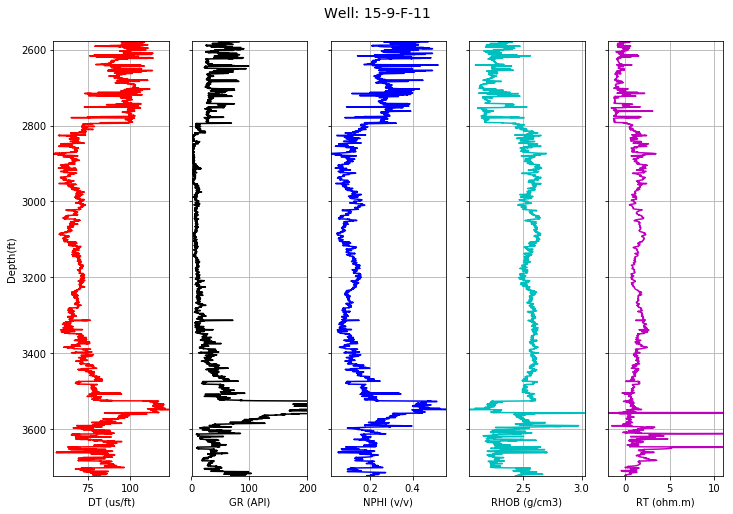

In [42]:
test['DT'] = pred_ext1
log_plot1(test)

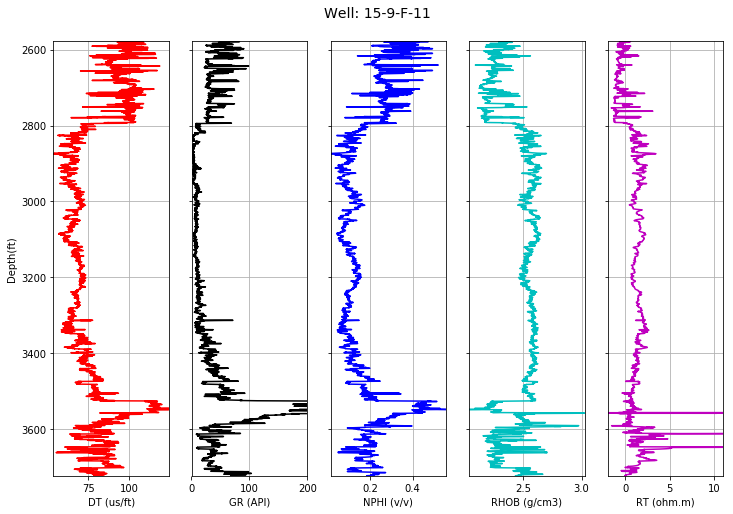

In [43]:
test['DT'] = pred_rf1
log_plot1(test)

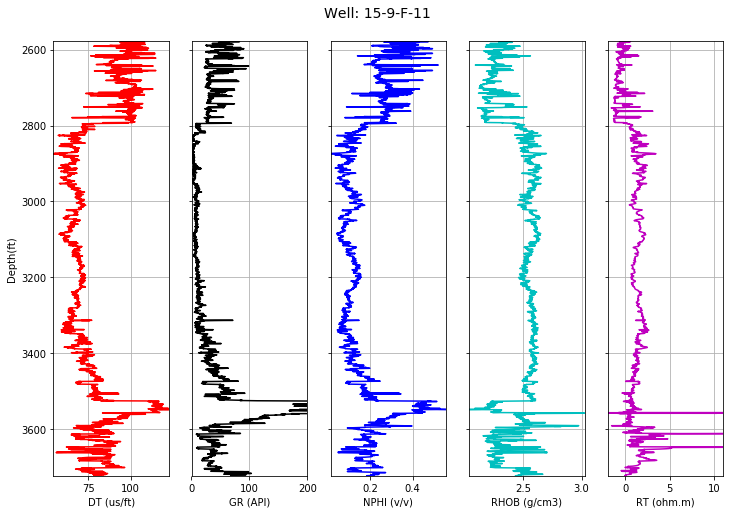

In [44]:
test['DT'] = avg1
log_plot1(test)

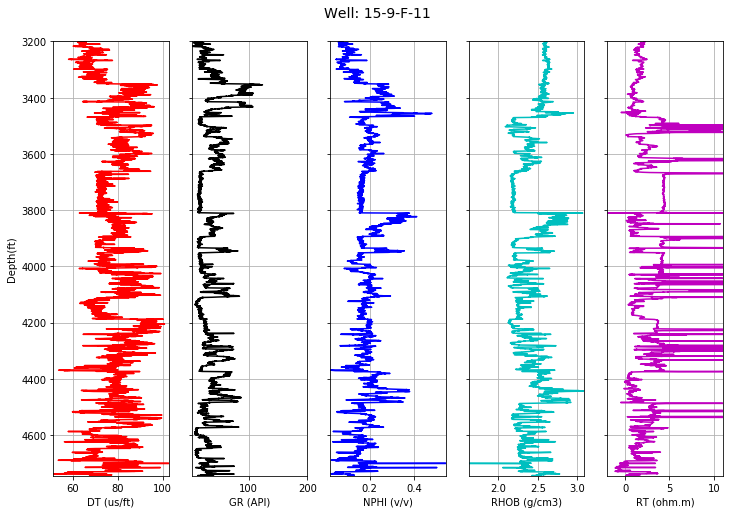

In [45]:
edited = pd.read_csv('11B.csv')

edited = edited.drop(['DEPTH'], axis=1)
edited = np.array(edited)

pred_ext2 = ext1.predict(edited)

edited = pd.read_csv('11B.csv')
edited['DT'] = pred_ext2

edited['RT'] = np.log(edited['RT'])
log_plot1(edited)

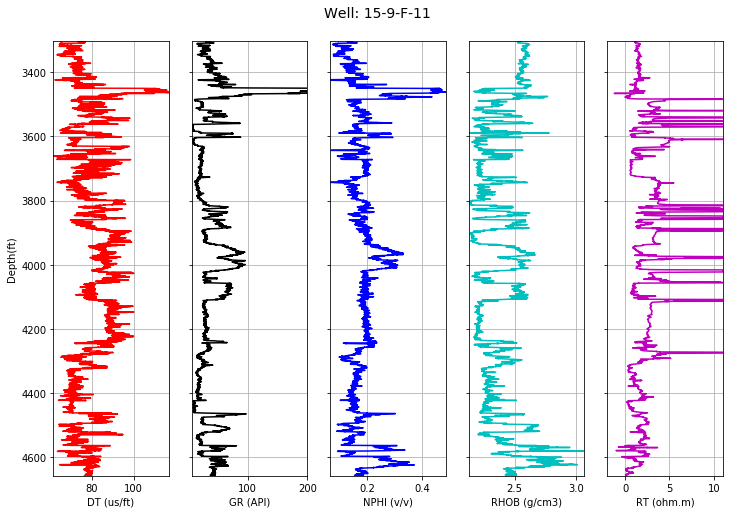

In [47]:
edited = pd.read_csv('15D.csv')

edited = edited.drop(['DEPTH'], axis=1)
edited = np.array(edited)

pred_ext2 = ext1.predict(edited)

edited = pd.read_csv('15D.csv')
edited['DT'] = pred_ext2

edited['RT'] = np.log(edited['RT'])
log_plot1(edited)